<a href="https://colab.research.google.com/github/Nelson-Muteti/IP-WEEK-4/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_02_Nelson_Muteti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#first import the necessary libraries

import pandas as pd

import numpy as np



import matplotlib.pyplot as plt
% matplotlib inline 

In [ ]:
#load the data from a csv file and preview the data
data = '/content/Autolib_dataset (2).csv'
df = pd.read_csv(data)
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [ ]:
#get shape of data
df.shape

(5000, 25)

In [ ]:
#get column names for the data
df.columns


Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [ ]:
#basic data cleaning
#check for null values
df.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [ ]:
#drop the two columns with high NA values since they may not be
#as useful anyway
df.drop(['Displayed comment','Scheduled at','Geo point','Address'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cars                 5000 non-null   int64 
 1   Bluecar counter      5000 non-null   int64 
 2   Utilib counter       5000 non-null   int64 
 3   Utilib 1.4 counter   5000 non-null   int64 
 4   Charge Slots         5000 non-null   int64 
 5   Charging Status      5000 non-null   object
 6   City                 5000 non-null   object
 7   ID                   5000 non-null   object
 8   Kind                 5000 non-null   object
 9   Postal code          5000 non-null   int64 
 10  Public name          5000 non-null   object
 11  Rental status        5000 non-null   object
 12  Slots                5000 non-null   int64 
 13  Station type         5000 non-null   object
 14  Status               5000 non-null   object
 15  Subscription status  5000 non-null   object
 16  year  

In [ ]:
#get descriptive data 
#notice the average number of Bluecars at station is higher than Utilib cars 
df.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [ ]:
#just confirming that there is no missing data in the dataframe
df.isnull().any()

Cars                   False
Bluecar counter        False
Utilib counter         False
Utilib 1.4 counter     False
Charge Slots           False
Charging Status        False
City                   False
ID                     False
Kind                   False
Postal code            False
Public name            False
Rental status          False
Slots                  False
Station type           False
Status                 False
Subscription status    False
year                   False
month                  False
day                    False
hour                   False
minute                 False
dtype: bool

In [ ]:
#change the dates into a better datetime format
#df['Date'] = df['year'].map(str) + '-' + df['month'].map(str) + '-' + df['day'].map(str) + '-' + df['hour'].map(str) + '-' + df['minute'].map(str)
#df.info()
df['date'] = pd.to_datetime(df[['year', 'month', 'day','hour','minute']])
df.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00


In [ ]:
#just checking the data type of date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Cars                 5000 non-null   int64         
 1   Bluecar counter      5000 non-null   int64         
 2   Utilib counter       5000 non-null   int64         
 3   Utilib 1.4 counter   5000 non-null   int64         
 4   Charge Slots         5000 non-null   int64         
 5   Charging Status      5000 non-null   object        
 6   City                 5000 non-null   object        
 7   ID                   5000 non-null   object        
 8   Kind                 5000 non-null   object        
 9   Postal code          5000 non-null   int64         
 10  Public name          5000 non-null   object        
 11  Rental status        5000 non-null   object        
 12  Slots                5000 non-null   int64         
 13  Station type         5000 non-nul

In [ ]:
#arrange the data in order of times
df = df.sort_values(by = 'date', ascending = True)
df.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date
1046,0,0,0,0,0,nonexistent,Paris,paris-monge-112,STATION,75005,Paris/Monge/112,operational,4,station,ok,nonexistent,2018,4,1,0,0,2018-04-01 00:00:00
1107,0,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,PARKING,75008,Paris/Madeleine Tronchet/Parking,operational,6,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2874,0,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,STATION,75015,Paris/SÃ©bastien Mercier/44,operational,4,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2059,1,1,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,75016,Paris/Mozart/2,operational,3,station,ok,nonexistent,2018,4,1,0,3,2018-04-01 00:03:00
4453,0,0,0,0,1,operational,Paris,paris-neuvesaintpierre-2,STATION,75004,Paris/Neuve Saint-Pierre/2,operational,4,station,ok,nonexistent,2018,4,1,0,4,2018-04-01 00:04:00


In [ ]:
#check and drop any duplicates
df.duplicated()
df.drop_duplicates()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date
1046,0,0,0,0,0,nonexistent,Paris,paris-monge-112,STATION,75005,Paris/Monge/112,operational,4,station,ok,nonexistent,2018,4,1,0,0,2018-04-01 00:00:00
1107,0,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,PARKING,75008,Paris/Madeleine Tronchet/Parking,operational,6,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2874,0,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,STATION,75015,Paris/SÃ©bastien Mercier/44,operational,4,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2059,1,1,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,75016,Paris/Mozart/2,operational,3,station,ok,nonexistent,2018,4,1,0,3,2018-04-01 00:03:00
4453,0,0,0,0,1,operational,Paris,paris-neuvesaintpierre-2,STATION,75004,Paris/Neuve Saint-Pierre/2,operational,4,station,ok,nonexistent,2018,4,1,0,4,2018-04-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2,2,0,0,0,nonexistent,CrÃ©teil,creteil-denfertrochereau-12,STATION,94000,CrÃ©teil/Denfert Rochereau/12,operational,4,station,ok,nonexistent,2018,4,9,23,48,2018-04-09 23:48:00
2672,2,2,0,1,0,operational,Paris,paris-gerbert-11,STATION,75015,Paris/Gerbert/11,operational,0,station,ok,nonexistent,2018,4,9,23,48,2018-04-09 23:48:00
4582,5,5,0,0,0,operational,Paris,paris-crimee-82,STATION,75019,Paris/CrimÃ©e/82,operational,1,station,ok,nonexistent,2018,4,9,23,56,2018-04-09 23:56:00
3201,0,0,0,0,0,nonexistent,Paris,paris-notredamedesvictoires-21,STATION,75002,Paris/Notre-Dame des Victoires/21,operational,4,station,ok,nonexistent,2018,4,9,23,58,2018-04-09 23:58:00


In [ ]:
#this checks the activity of each station
#if a car is picked, the net number of cars from one time to the next decreases resulting in a net 
#differential or net negative in the number of cars. The vice versa is true 
df['Bluecar_activity'] = df.groupby('Public name')['Bluecar counter'].diff().fillna(0)
df['Utilib_car_activity'] = df.groupby('Public name')['Utilib counter'].diff().fillna(0)
df.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date,Bluecar_activity,Utilib_car_activity
1046,0,0,0,0,0,nonexistent,Paris,paris-monge-112,STATION,75005,Paris/Monge/112,operational,4,station,ok,nonexistent,2018,4,1,0,0,2018-04-01 00:00:00,0.0,0.0
1107,0,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,PARKING,75008,Paris/Madeleine Tronchet/Parking,operational,6,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00,0.0,0.0
2874,0,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,STATION,75015,Paris/SÃ©bastien Mercier/44,operational,4,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00,0.0,0.0
2059,1,1,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,75016,Paris/Mozart/2,operational,3,station,ok,nonexistent,2018,4,1,0,3,2018-04-01 00:03:00,0.0,0.0
4453,0,0,0,0,1,operational,Paris,paris-neuvesaintpierre-2,STATION,75004,Paris/Neuve Saint-Pierre/2,operational,4,station,ok,nonexistent,2018,4,1,0,4,2018-04-01 00:04:00,0.0,0.0


In [ ]:
df['Bluecar_activity'] = df['Bluecar_activity'].astype(str)
df['Utilib_car_activity'] = df['Utilib_car_activity'].astype(str)

In [ ]:
#assigning columns to succesive times to denote if a car was returned , picked or nothing happened.
df.loc[df['Bluecar_activity'] > '0', ['Bluecar_activity']] = 'Returned'
df.loc[df['Bluecar_activity'] < '0', ['Bluecar_activity']] = 'Picked'
df.loc[df['Utilib_car_activity'] > '0', ['Utilib_car_activity']] = 'Returned'
df.loc[df['Utilib_car_activity'] < '0', ['Utilib_car_activity']] = 'Picked'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1046 to 4443
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Cars                 5000 non-null   int64         
 1   Bluecar counter      5000 non-null   int64         
 2   Utilib counter       5000 non-null   int64         
 3   Utilib 1.4 counter   5000 non-null   int64         
 4   Charge Slots         5000 non-null   int64         
 5   Charging Status      5000 non-null   object        
 6   City                 5000 non-null   object        
 7   ID                   5000 non-null   object        
 8   Kind                 5000 non-null   object        
 9   Postal code          5000 non-null   int64         
 10  Public name          5000 non-null   object        
 11  Rental status        5000 non-null   object        
 12  Slots                5000 non-null   int64         
 13  Station type         5000 non-

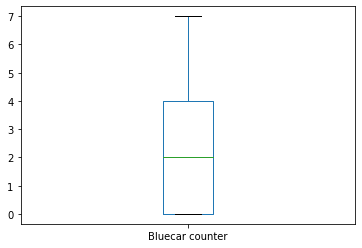

In [ ]:
#Get outliers for the data
#Plot boxplots for the Bluecar Counter data
#Data seems to lie within reasonable bounds.
df.boxplot(column =['Bluecar counter'], grid = False) 

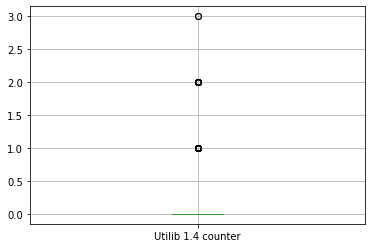

In [ ]:
#Get outliers for the data
#Plot boxplot for Utilib 1.4 cars for the data
df.boxplot(column =['Utilib 1.4 counter'], grid = True) 

In [ ]:
#just checking output of my data for a given  car station
select_row = df.loc[df['Public name'] == 'Paris/Mozart/2']
select_row.head()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date,Bluecar_activity,Utilib_car_activity
2059,1,1,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,75016,Paris/Mozart/2,operational,3,station,ok,nonexistent,2018,4,1,0,3,2018-04-01 00:03:00,Returned,Returned
3506,0,0,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,75016,Paris/Mozart/2,operational,0,station,ok,nonexistent,2018,4,2,19,23,2018-04-02 19:23:00,Picked,Returned
4375,2,2,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,75016,Paris/Mozart/2,operational,2,station,ok,nonexistent,2018,4,8,9,8,2018-04-08 09:08:00,Returned,Returned
1442,3,3,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,75016,Paris/Mozart/2,operational,0,station,ok,nonexistent,2018,4,8,13,5,2018-04-08 13:05:00,Returned,Returned


In [ ]:
#What station is the most popular for Bluecars?
#Paris/Porte de Montrouge/8 was the most popular for bluecars having had cars being picked more times
select_row = df.loc[df['Bluecar_activity'] =='Picked']
mydf = select_row.groupby(['Public name']).size()
new_df = mydf.to_frame(name = 'No_of_times_picked').reset_index()
new_df = new_df.sort_values(by = 'No_of_times_picked', ascending = False)
new_df.head(5)

,Public name,No_of_times_picked
576,Paris/Porte de Montrouge/8,6
136,Fontenay-aux-Roses/Robert Marchand/32,5
523,Paris/Mozart/68,5
304,Paris/BrÃ©montier/19,5
169,La Garenne-Colombes/National/90,5


In [ ]:
#What station is the most popular for Utilib cars 
#utilib cars were not as much picked as Utilib in individual stations
select_row = df.loc[df['Utilib_car_activity'] == 'Picked']
mydf = select_row.groupby(['Public name']).size()
new_df = mydf.to_frame(name = 'size').reset_index()
new_df = new_df.sort_values(by = 'size', ascending = False)
new_df.head(5)

,Public name,size
170,Ãpinay-sur-Seine/Fitzelin/64,2
156,Suresnes/HuchÃ©/26,2
89,Paris/HÃ©ricart/54,2
104,Paris/Mathis/35,2
108,Paris/Mozart/68,2


In [ ]:
#getting the most popular hour of the day
#apparently, the 2300h and 2100 are the most popular having
#7 car shares
mydf = df[(df['Bluecar_activity'] =='Picked') & (df['Utilib_car_activity'] == 'Picked')]
mydf = mydf.groupby(['hour']).size()
new_df = mydf.to_frame(name = 'count').reset_index()
new_df = new_df.sort_values(by = 'count', ascending = False)
new_df.head(10)

,hour,count
22,23,7
20,21,7
19,20,6
15,16,5
11,12,5
2,3,5
9,10,4
16,17,4
4,5,4
14,15,3


In [ ]:
#getting the least popular hour of the day
#apparently, the 0000h, 0800h,0700, 2200 are the least popular having
#only 1 car share
mydf = df[(df['Bluecar_activity'] =='Picked') & (df['Utilib_car_activity'] == 'Picked')]
mydf = mydf.groupby(['hour']).size()
new_df = mydf.to_frame(name = 'count').reset_index()
new_df = new_df.sort_values(by = 'count', ascending = True)
new_df.head(10)

,hour,count
0,0,1
21,22,1
7,8,1
6,7,1
8,9,1
3,4,1
5,6,2
17,18,2
10,11,2
1,1,2


In [ ]:
#most popular station at the most popular hour was Paris/Tronchet/19 station
select_row = df.loc[df['hour'] == 21]
mydf = select_row[(select_row['Bluecar_activity'] =='Picked') & (select_row['Utilib_car_activity'] == 'Picked')]
mydf = mydf.groupby(['Public name']).size()
new_df = mydf.to_frame(name = 'count').reset_index()
new_df = new_df.sort_values(by = 'count', ascending = False)
new_df.head(5)

,Public name,count
0,Meudon/MarÃ©chal Juin/18,1
1,Montreuil/Franklin/18,1
2,Paris/Mozart/68,1
3,Paris/Pereire/170,1
4,Paris/Picpus/122,1


In [ ]:
#the most popular hour for picking bluecars
#apparently, 1800h and 2100 h are very popular hours
#mostly rush hour times in the Paris region
select_row = df.loc[df['Bluecar_activity'] == 'Picked']
mydf = select_row.groupby(['hour']).size()
new_df = mydf.to_frame(name = 'count').reset_index()
new_df = new_df.sort_values(by = 'count', ascending = False)
new_df.head(5)

,hour,count
18,18,79
21,21,76
22,22,71
17,17,70
11,11,70


In [ ]:
#On the other hand, Utilib stations seem to be more popular at around
#2300h and 2100h
select_row = df.loc[df['Utilib_car_activity'] == 'Picked']
mydf = select_row.groupby(['hour']).size()
new_df = mydf.to_frame(name = 'count').reset_index()
new_df = new_df.sort_values(by = 'count', ascending = False)
new_df.head(5)

,hour,count
23,23,13
21,21,13
2,2,11
9,9,10
20,20,9


In [ ]:
#comparing which car was the most popular
#Bluecars were more popular having been picked many times in stations.
select_row = df.loc[df['Bluecar_activity'] == 'Picked']
print(select_row['Bluecar_activity'].count())

my_row = df.loc[df['Utilib_car_activity'] == 'Picked']
print(my_row['Utilib_car_activity'].count())

1378
179


In [ ]:
#06000h seems to be the most popular hour for returning cars
#people return cars mostly in the morning hours after use
mydf = df[(df['Bluecar_activity'] =='Returned') & (df['Utilib_car_activity'] == 'Returned')]
mydf = mydf.groupby(['hour']).size()
new_df = mydf.to_frame(name = 'count').reset_index()
new_df = new_df.sort_values(by = 'count', ascending = False)
new_df.head(5)

,hour,count
6,6,177
7,7,172
9,9,168
3,3,162
5,5,162


In [ ]:
#Paris/Grenelle 31/Parking is the most popular station for returning cars
mydf = df[(df['Bluecar_activity'] =='Returned') & (df['Utilib_car_activity'] == 'Returned')]
mydf = mydf.groupby(['Public name']).size()
new_df = mydf.to_frame(name = 'count').reset_index()
new_df = new_df.sort_values(by = 'count', ascending = False)
new_df.head(5)

,Public name,count
588,Paris/Grenelle 31/Parking,11
495,Paris/Courcelles/69,10
950,Paris/Villiot/20,9
959,Paris/Voltaire/182,8
533,Paris/Etoile Foch/Parking,8
